In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

# Python magic
%matplotlib inline

# Base packages
import gc, sys, re, os
from time import strptime, mktime

# Data processing/preprocessing/modeling packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stat
from sklearn.preprocessing import *
# Modeling settings
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# Testing & Validation packages
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

# KNN
from sklearn.neighbors import KNeighborsClassifier
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
from pydotplus import *
# SVM
from sklearn.svm import SVC

In [2]:
X_train1 = pd.read_csv('data/1/TrainData1.txt', delimiter='\s+', header=None)
X_train2 = pd.read_csv('data/1/TrainData2.txt', delimiter='\s+', header=None)
X_train3 = pd.read_csv('data/1/TrainData3.txt', delimiter='\s+', header=None)
X_train4 = pd.read_csv('data/1/TrainData4.txt', delimiter='\s+', header=None)
X_train5 = pd.read_csv('data/1/TrainData5.txt', delimiter='\s+', header=None)
X_train6 = pd.read_csv('data/1/TrainData6.txt', delimiter='\s+', header=None)

In [3]:
y_train1 = pd.read_csv('data/1/TrainLabel1.txt', delimiter='\n', header=None)
y_train2 = pd.read_csv('data/1/TrainLabel2.txt', delimiter='\n', header=None)
y_train3 = pd.read_csv('data/1/TrainLabel3.txt', delimiter='\n', header=None)
y_train4 = pd.read_csv('data/1/TrainLabel4.txt', delimiter='\n', header=None)
y_train5 = pd.read_csv('data/1/TrainLabel5.txt', delimiter='\n', header=None)
y_train6 = pd.read_csv('data/1/TrainLabel6.txt', delimiter='\n', header=None)

In [4]:
test1 = pd.read_csv('data/1/TestData1.txt', delimiter='\s+', header=None)
test2 = pd.read_csv('data/1/TestData2.txt', delimiter='\s+', header=None)
test3 = pd.read_csv('data/1/TestData3.txt', delimiter=',',   header=None)
test4 = pd.read_csv('data/1/TestData4.txt', delimiter='\s+', header=None)
test5 = pd.read_csv('data/1/TestData5.txt', delimiter='\s+', header=None)
test6 = pd.read_csv('data/1/TestData6.txt', delimiter='\s+', header=None)

In [5]:
X_training = [X_train1, X_train2, X_train3, X_train4, X_train5, X_train6]
y_training = [y_train1, y_train2, y_train3, y_train4, y_train5, y_train6]
all_testing = [test1, test2, test3, test4, test5, test6]

In [6]:
for i,x in enumerate(X_training):
    print(f'X_TrainData{i+1} Shape: {x.shape}')

X_TrainData1 Shape: (150, 3312)
X_TrainData2 Shape: (100, 9182)
X_TrainData3 Shape: (6300, 13)
X_TrainData4 Shape: (2547, 112)
X_TrainData5 Shape: (1119, 11)
X_TrainData6 Shape: (612, 142)


In [95]:
for i,y in enumerate(y_training):
    print(f'y_TrainData{i+1} Shape: {y.shape}')

y_TrainData1 Shape: (150, 1)
y_TrainData2 Shape: (100, 1)
y_TrainData3 Shape: (6300, 1)
y_TrainData4 Shape: (2547, 1)
y_TrainData5 Shape: (1119, 1)
y_TrainData6 Shape: (612, 1)


In [96]:
for j,y in enumerate(all_testing):
    print(f'TestData{j+1} Shape: {y.shape}')

TestData1 Shape: (53, 3312)
TestData2 Shape: (74, 9182)
TestData3 Shape: (2693, 13)
TestData4 Shape: (1092, 112)
TestData5 Shape: (480, 11)
TestData6 Shape: (262, 142)


In [97]:
np.random.seed(42)
X = X_train1.values
y = y_train1[0].values

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, stratify=y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(97, 3312) (97,)
(53, 3312) (53,)


In [99]:
neighbors = np.arange(1,20)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [100]:
for i,k in enumerate(neighbors):
    
    knn = KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(X_train, y_train)
    
    train_accuracy[i] = knn.score(X_train, y_train)
    
    test_accuracy[i] = knn.score(X_test, y_test)

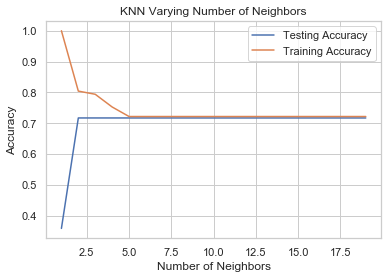

In [101]:
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Varying Number of Neighbors')
plt.show()

In [102]:
n_neighbors=5
knn = KNeighborsClassifier(n_neighbors)

In [103]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [104]:
knn.score(X_test, y_test)

0.7169811320754716

In [105]:
y_pred = knn.predict(X_test)

In [106]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,1,All
True,,
1,38,38
2,5,5
3,4,4
4,5,5
5,1,1
All,53,53


In [107]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.72      1.00      0.84        38
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         1

    accuracy                           0.72        53
   macro avg       0.14      0.20      0.17        53
weighted avg       0.51      0.72      0.60        53



In [108]:
new_y_test = y_pred

In [109]:
neighbors = np.arange(1,20)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [110]:
for i,k in enumerate(neighbors):
    
    knn = KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(X_train, y_train)
    
    train_accuracy[i] = knn.score(X_train, y_train)
    
    test_accuracy[i] = knn.score(X_test, new_y_test)

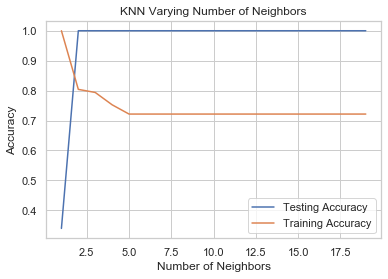

In [111]:
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Varying Number of Neighbors')
plt.show()

In [121]:
nknn = KNeighborsClassifier(n_neighbors=1)

nknn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [123]:
nknn.score(X_test, new_y_test)

0.33962264150943394

In [125]:
ny_pred = nknn.predict(X_test)

In [126]:
pd.crosstab(new_y_test, ny_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,1,2,All
True,,,
1,18,35,53
All,18,35,53


In [127]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.78      0.37      0.50        38
           2       0.14      1.00      0.25         5
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         1

    accuracy                           0.36        53
   macro avg       0.18      0.27      0.15        53
weighted avg       0.57      0.36      0.38        53



In [25]:
# # Logistic Regression
# log_reg = LogisticRegression(solver='lbfgs')
# log_reg.fit(X_train1, y_train1)